# Sentiment Analysis using Amazon Reviews

### Importing Libraries

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Importing data

In [2]:
df = pd.read_csv("Reviews.csv")

In [52]:
df.sample(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
295345,295346,B000PHMX2Q,A36S2VKY45298D,"Solestra ""Solestra""",5,5,5,1970-01-01 00:00:01.265068800,Solestra,This is the same product sold in the 'brick an...
353356,353357,B005P0NLJ2,A1RSSLRPUQE29Z,greenmanalishi,3,3,1,1970-01-01 00:00:01.336608000,HORRIBLE STOMACH PAIN!!,I have Celiac Disease and heard so much good s...
310154,310155,B003DA54ZA,A6VKWB820SFZ,J Cat,1,1,1,1970-01-01 00:00:01.344384000,Horrible,Sad to see that these are made in China. China...
263693,263694,B0001W2W5S,AQNYCN5Y8K2J6,RunningTooSlow,0,0,5,1970-01-01 00:00:01.302220800,"Great sprouts, lousy packaging!","Still 5 stars, since the sprouts were some of ..."
47308,47309,B0029O10P4,A2ZQ0DV7WQIT67,Patty,0,0,5,1970-01-01 00:00:01.340150400,Kitty Crack,All three of my cats are crazy about these. T...


In [16]:
# Conveting column to datatime
df["Time"] = pd.to_datetime(df["Time"])

In [19]:
# Checking Dimensions
df.shape

(568454, 10)

In [20]:
# Checking Column Names
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [21]:
# Checking General Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      568454 non-null  int64         
 1   ProductId               568454 non-null  object        
 2   UserId                  568454 non-null  object        
 3   ProfileName             568438 non-null  object        
 4   HelpfulnessNumerator    568454 non-null  int64         
 5   HelpfulnessDenominator  568454 non-null  int64         
 6   Score                   568454 non-null  int64         
 7   Time                    568454 non-null  datetime64[ns]
 8   Summary                 568427 non-null  object        
 9   Text                    568454 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 43.4+ MB


In [22]:
# Checking Descriptive info
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score
count,568454.000000,568454.000000,568454.00000,568454.000000
mean,284227.500000,1.743817,2.22881,4.183199
std,164098.679298,7.636513,8.28974,1.310436
min,1.000000,0.000000,0.00000,1.000000
25%,142114.250000,0.000000,0.00000,4.000000
50%,284227.500000,0.000000,1.00000,5.000000
75%,426340.750000,2.000000,2.00000,5.000000
max,568454.000000,866.000000,923.00000,5.000000


In [23]:
# Data Types
df.dtypes

Id                                 int64
ProductId                         object
UserId                            object
ProfileName                       object
HelpfulnessNumerator               int64
HelpfulnessDenominator             int64
Score                              int64
Time                      datetime64[ns]
Summary                           object
Text                              object
dtype: object

In [59]:
# Checking Null Values
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [60]:
# Dropping as null values are low in proportion 
df.dropna(inplace=True)

In [61]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [65]:
# Checking Duplicated Values
df.duplicated().sum()

0

In [63]:
df.shape

(568411, 10)

In [25]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1970-01-01 00:00:01.303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1970-01-01 00:00:01.346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1970-01-01 00:00:01.219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1970-01-01 00:00:01.307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1970-01-01 00:00:01.350777600,Great taffy,Great taffy at a great price. There was a wid...


### EDA

In [34]:
# Checking Value Count
df["HelpfulnessDenominator"].value_counts().sort_index()

0      270052
1      112753
2       61482
3       34394
4       22306
        ...  
569         1
593         1
815         1
878         1
923         1
Name: HelpfulnessDenominator, Length: 234, dtype: int64

[]

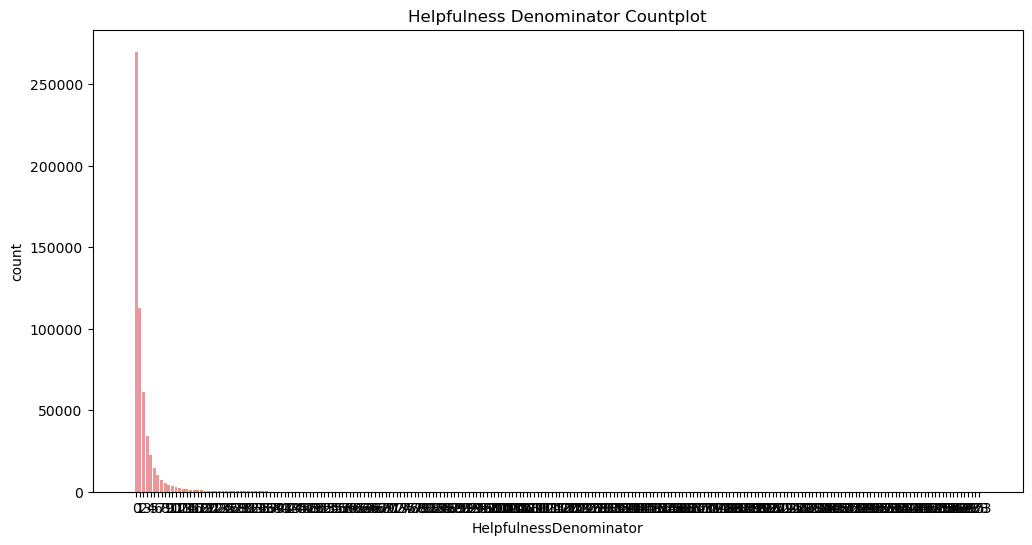

In [70]:
# Plotting Data
plt.figure(figsize=(12,6))
sns.countplot(x="HelpfulnessDenominator", data=df)
plt.title('Helpfulness Denominator Countplot')
plt.plot()

Text(0.5, 1.0, 'Helpfulness Denominator Top 25 Values')

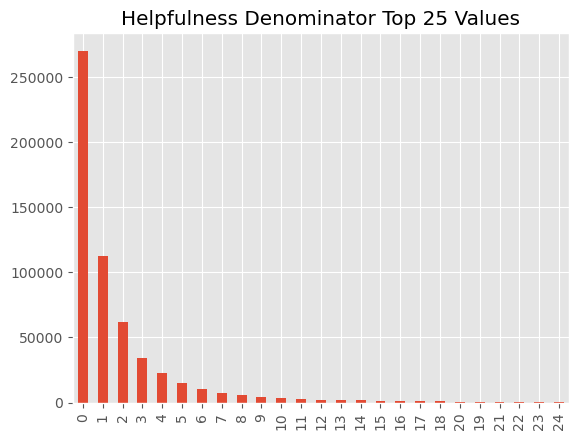

In [80]:
# Top 25 
df["HelpfulnessDenominator"].value_counts().head(25).plot(kind="bar")
plt.title('Helpfulness Denominator Top 25 Values')

[]

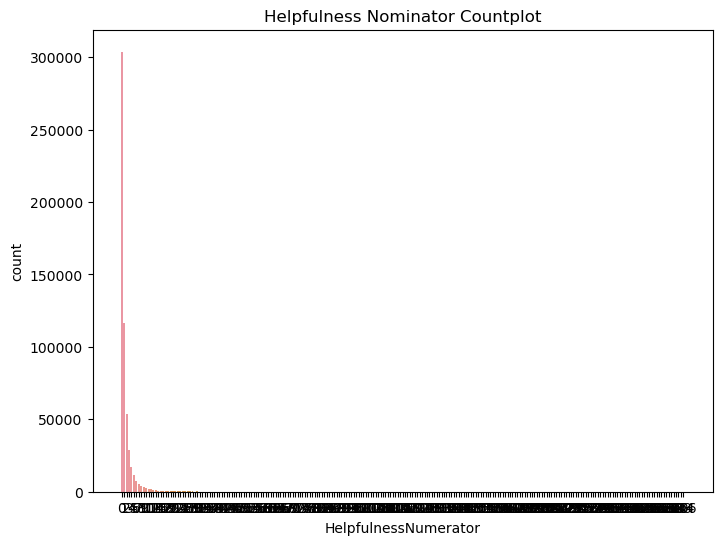

In [72]:
# Similarly for Numerators
plt.figure(figsize=(8,6))
sns.countplot(x="HelpfulnessNumerator", data=df)
plt.title('Helpfulness Nominator Countplot')
plt.plot()

In [43]:
df["HelpfulnessNumerator"].value_counts().sort_index()

0      303826
1      116467
2       53727
3       29007
4       16963
        ...  
559        10
580         1
808         1
844         1
866         1
Name: HelpfulnessNumerator, Length: 231, dtype: int64

Text(0.5, 1.0, 'Helpfulness Numerator Top 25 Values')

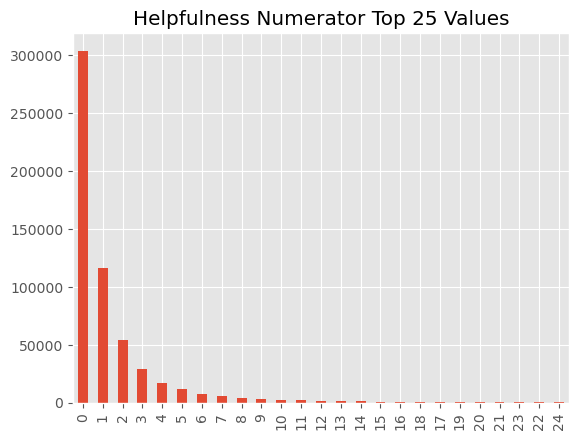

In [81]:
df["HelpfulnessNumerator"].value_counts().head(25).plot(kind="bar")
plt.title('Helpfulness Numerator Top 25 Values')

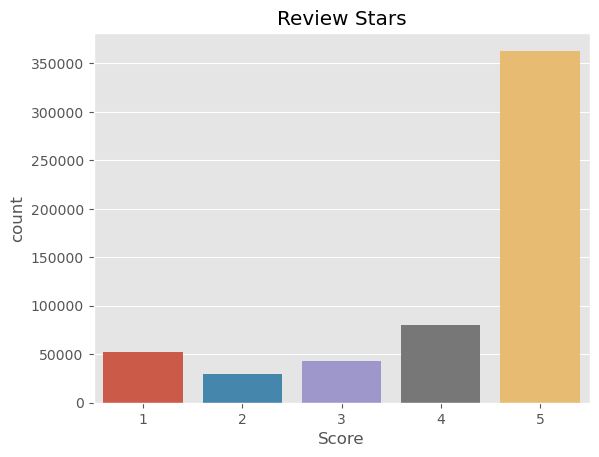

In [82]:
# Checking Score Distribution
sns.countplot(x="Score", data =df)
plt.title('Review Stars')
plt.show()

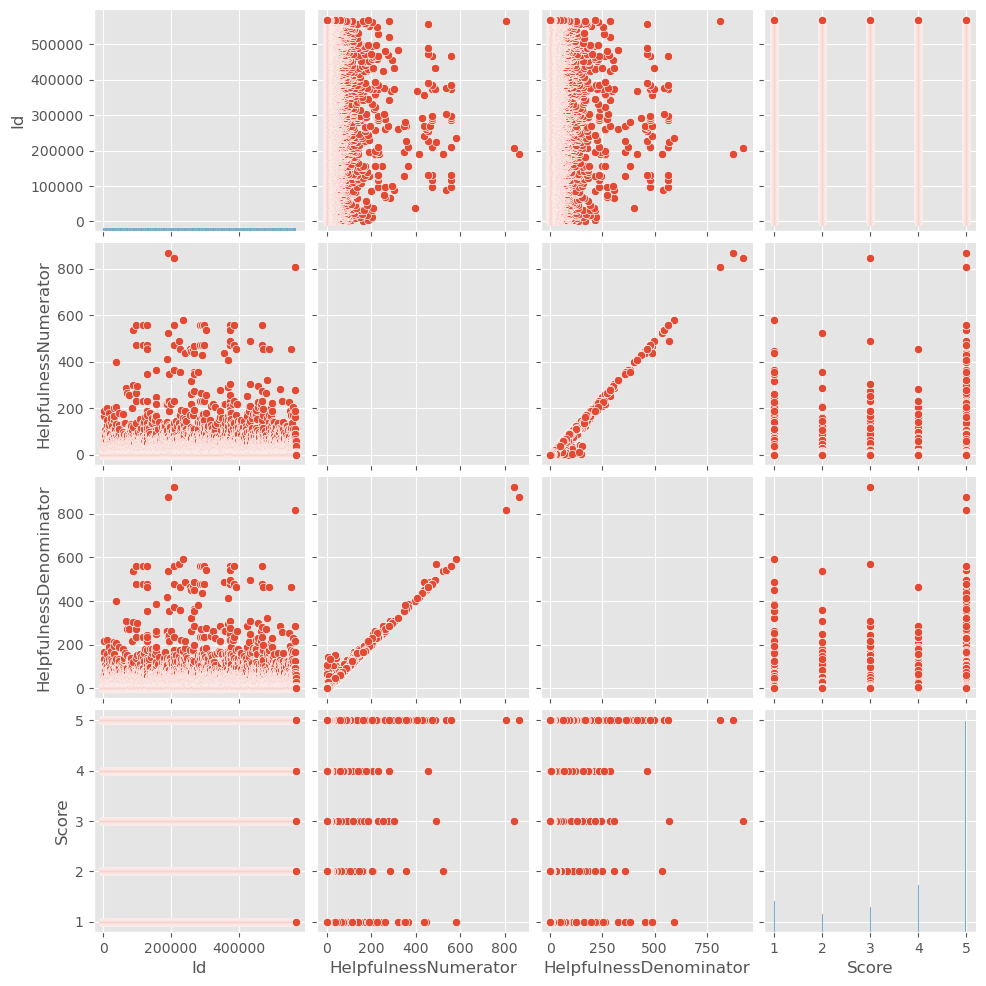

In [84]:
# Checking Correlation
sns.pairplot(df)
plt.show()

<AxesSubplot:>

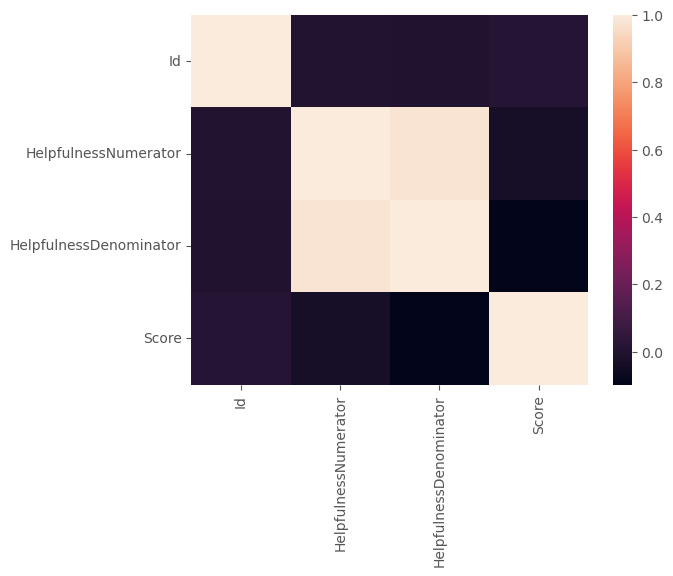

In [85]:
# Heatmap
sns.heatmap(df.corr())

### Next on, we can start our NLP to analyze reviews and start our sentimental analysis.

# Thanks!!